<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a  href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Проанализируйте-данные" data-toc-modified-id="Проанализируйте-данные-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проанализируйте данные</a></span></li><li><span><a href="#Проверьте-гипотезы" data-toc-modified-id="Проверьте-гипотезы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверьте гипотезы</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a 

# Анализ тарифов 
Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
В процессе изучения данных сделаем следущее:
* Изучим данные из файла
* Сделаем предобработку данных
* Проанализируем данные
* Проверим гипотезы


Описание тарифов
Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей
Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


#  Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats as st
warnings.filterwarnings("ignore")
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Посмотрим данные в таблице tariffs

Информационная таблица для описания тарифа. Здесь все значения в норме

Посмотрим данные в таблице users

In [2]:
users = pd.read_csv('/datasets/users.csv' )
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Проверим, все ли пользователи уникальные:

In [3]:
print("Число строк в users:", users.shape[0])
print("Число уникальных пользователей:", users['user_id'].count())
print("Число дубликатов:", users.duplicated().sum())

Число строк в users: 500
Число уникальных пользователей: 500
Число дубликатов: 0


Все пользователи уникальные, дубликатов нет.

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Много значений NaN в столбце "churn_date", но в описании проекта сказано, что если в данном столбце пропущенны данные, то это значит, что тариф еще действует у абонента на момент выгрузки данных. Это оставляем все как есть. Столбец "reg_date" приведем к  datetime.

Изучим таблицу messages

In [5]:
messages = pd.read_csv('/datasets/messages.csv' )
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [6]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице messages пропущенных значений не наблюдается, столбец "message_date" тоже приведем к datetime.

Изучим таблицу internet

In [7]:
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


В таблице internet пропущенных значений не наблюдается, столбец "session_date" тоже приведем к datetime.

Изучим таблицу calls

In [9]:
calls = pd.read_csv('/datasets/calls.csv' )
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [10]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице calls пропущенных значений не наблюдается, столбец "call_date" тоже приведем к datetime.

Вывод: Все файлы открыты и вся общая информация изучена из этих файлов. Столбец "reg_date", "session_date", "call_date", "message_date"  приведем к datetime.

# Предобработка данных

Изменение типа данных столбцов 'reg_date', 'message_date', 'session_date', 'call_date'   с датами на datetime:

In [11]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

Добавим столбец месяц в таблицы, чтобы в дальнейшем делать расчеты по месяцам

In [12]:
users['month'] = pd.DatetimeIndex(users['reg_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

По заданию: «Мегалайн» всегда округляет вверх значения минут и мегабайт. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
Округляем в большую сторону до мегабайта весь трафик по каждой сессии при помощи np.floor:

In [13]:
#internet['mb_used'] = np.ceil(internet['mb_used'])
calls['duration'] =  np.ceil(calls['duration'])

In [14]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [15]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [16]:
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [17]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


Посмотрим на гистограмму распределения использования интернет-трафика в сессиях:

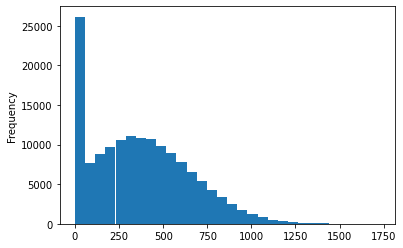

In [18]:

internet['mb_used'].plot(kind='hist', bins=30);

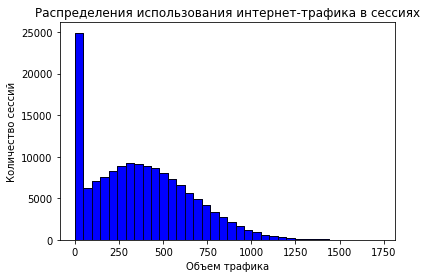

In [19]:
# matplotlib histogram
plt.hist(internet['mb_used'], color = 'blue', edgecolor = 'black',
         bins = int(180/5));

# seaborn histogram
sns.distplot(internet['mb_used'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'});
# Add labels
plt.title('Распределения использования интернет-трафика в сессиях');
plt.xlabel('Объем трафика');
plt.ylabel('Количество сессий');

Большое количество "нулевого" трафика, т.е интернет подключен, а загрузка страниц не происходила.

Выведем эти данные

In [20]:
internet.query('mb_used == 0.0')

,id,mb_used,session_date,user_id,month
11,1000_11,0.0,2018-08-28,1000,8
38,1000_38,0.0,2018-11-27,1000,11
46,1000_46,0.0,2018-06-30,1000,6
67,1000_67,0.0,2018-06-16,1000,6
72,1000_72,0.0,2018-06-15,1000,6
...,...,...,...,...,...
149380,1499_141,0.0,2018-12-11,1499,12
149381,1499_142,0.0,2018-11-01,1499,11
149383,1499_144,0.0,2018-11-27,1499,11
149386,1499_147,0.0,2018-10-21,1499,10


Удалим эти строки, так как для оценки тарифа они ни как не влияют.

In [21]:
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()

Проверяем

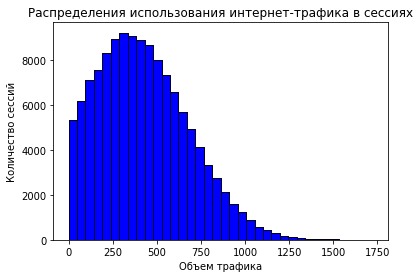

In [22]:
# matplotlib histogram
plt.hist(internet['mb_used'], color = 'blue', edgecolor = 'black',
         bins = int(180/5));

# seaborn histogram
sns.distplot(internet['mb_used'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'});
# Add labels
plt.title('Распределения использования интернет-трафика в сессиях');
plt.xlabel('Объем трафика');
plt.ylabel('Количество сессий');

In [23]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


Посмотрим на гистограмму распределения длительности звонков:

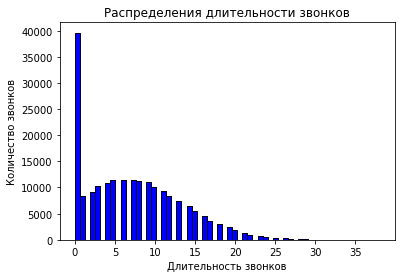

In [24]:
# matplotlib histogram
plt.hist(calls['duration'], color = 'blue', edgecolor = 'black',
         bins = int(60));

# seaborn histogram
sns.distplot(calls['duration'], hist=True, kde=False, 
             bins=int(60), color = 'blue',
             hist_kws={'edgecolor':'black'});
# Add labels
plt.title('Распределения длительности звонков');
plt.xlabel('Длительность звонков');
plt.ylabel('Количество звонков');

Большое количество звонков по времени "ноль" выведем их

In [25]:
calls.query('duration == 0.0')

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
5,1000_5,2018-11-02,0.0,1000,11
6,1000_6,2018-10-18,0.0,1000,10
9,1000_9,2018-08-15,0.0,1000,8
...,...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499,12
202592,1499_205,2018-10-13,0.0,1499,10
202593,1499_206,2018-12-26,0.0,1499,12
202594,1499_207,2018-10-28,0.0,1499,10


Почти 48000 с нулевой длительностью по времени, по заданию это звонки - пропущенные, оставляем как есть

Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам

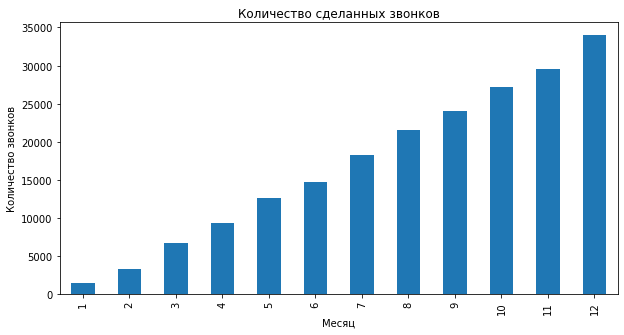

In [26]:
#Количество сделанных звонков
calls_filtered_count = calls.groupby('month')['duration'].count();
calls_filtered_count.plot(x='month', y ='duration', kind='bar',figsize=(10,5), title='Количество сделанных звонков', legend=None, xlabel = 'Месяц', ylabel = 'Количество звонков');

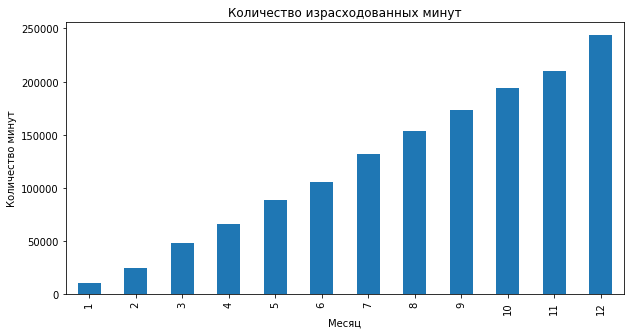

In [27]:
#Количество израсходованных минут
calls_filtered_sum = calls.groupby('month')['duration'].sum()
calls_filtered_sum.plot(x='month', y ='duration', kind='bar',figsize=(10,5), title='Количество израсходованных минут', legend=None, xlabel = 'Месяц', ylabel = 'Количество минут');

Посчитаем для каждого пользоввателя количество отправленных сообщений по месяцам

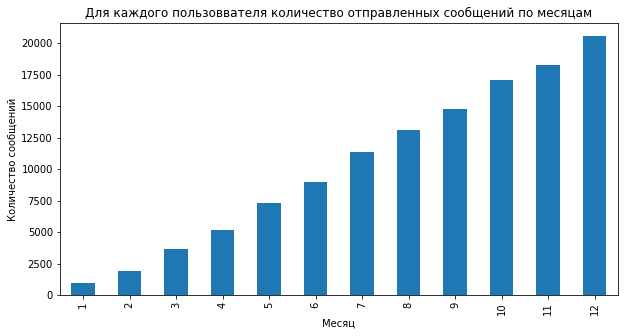

In [28]:
messages_filtered = messages.groupby('month')['id'].count()
messages_filtered.plot(x='month', y ='id', kind='bar',figsize=(10,5), title='Для каждого пользоввателя количество отправленных сообщений по месяцам', legend=None, xlabel = 'Месяц', ylabel = 'Количество сообщений');

Посчитаем объем израсходованного интернет-трафика по месяцам, перед этим добавим столбец представленных Мб в Гб.

In [29]:
internet['Gb_used'] = internet['mb_used']/1024

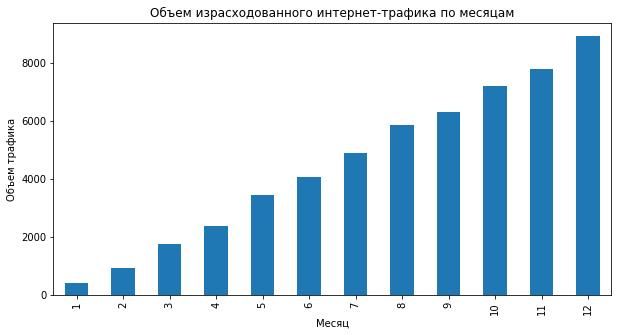

In [30]:
internet_filtered = internet.groupby('month')['Gb_used'].sum()
internet_filtered.plot(x='month', y ='Gb_used', kind='bar',figsize=(10,5), title='Объем израсходованного интернет-трафика по месяцам', legend=None, xlabel = 'Месяц', ylabel = 'Объем трафика');

Расчёт помесячной выручки с каждого пользователя:

 Для начала возьмем из каждого имеющегося датафрейма нужную информацию, в один датафрейм df_general:

In [31]:
df_calls = calls.groupby(['user_id', 'month' ])['duration'].agg(['count', 'sum'])
df_messages = messages.groupby(['user_id', 'month'])['id'].count()
df_internet = internet.groupby(['user_id', 'month']).sum()['mb_used']

In [32]:
df_general = pd.concat([df_calls , df_messages, df_internet], axis=1)
df_general = df_general.reset_index()
df_general.head()

,user_id,month,count,sum,id,mb_used
0,1000,5,22.0,159.0,22.0,2253.49
1,1000,6,43.0,172.0,60.0,23233.77
2,1000,7,47.0,340.0,75.0,14003.64
3,1000,8,52.0,408.0,81.0,14055.93
4,1000,9,58.0,466.0,57.0,14568.91


In [33]:
users_tariff = pd.Series(users['tariff'].values, index=users['user_id'])
df_general['tariff'] = df_general['user_id'].map(users_tariff)


In [34]:
df_general.head()

,user_id,month,count,sum,id,mb_used,tariff
0,1000,5,22.0,159.0,22.0,2253.49,ultra
1,1000,6,43.0,172.0,60.0,23233.77,ultra
2,1000,7,47.0,340.0,75.0,14003.64,ultra
3,1000,8,52.0,408.0,81.0,14055.93,ultra
4,1000,9,58.0,466.0,57.0,14568.91,ultra


Присоединим таблицу tariff к df_general 

In [35]:
df_general_total = pd.merge(df_general, tariffs, how ='left', left_on=('tariff'), right_on=('tariff_name'))
df_general_total

,user_id,month,count,sum,id,mb_used,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,22.0,159.0,22.0,2253.49,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,43.0,172.0,60.0,23233.77,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,47.0,340.0,75.0,14003.64,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,52.0,408.0,81.0,14055.93,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,58.0,466.0,57.0,14568.91,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,20579.36,smart,50,15360,500,550,200,3,3,smart
3210,1499,9,9.0,70.0,11.0,1845.75,smart,50,15360,500,550,200,3,3,smart
3211,1499,10,68.0,449.0,48.0,17788.51,smart,50,15360,500,550,200,3,3,smart
3212,1499,11,74.0,612.0,59.0,17963.31,smart,50,15360,500,550,200,3,3,smart


Для создания столбцов 'minut_max', 'sms_max', 'mb_max', напишем функцию, которая будет считать превышения.

In [36]:
def calls_over(df_general_total):
    var1 = 0
    if df_general_total['sum'] > df_general_total['minutes_included']:
        var1 += np.ceil(df_general_total['sum'] - df_general_total['minutes_included'])* df_general_total['rub_per_minute']
    return np.ceil(var1)
def sms_over(df_general_total):
    var2 = 0
    if df_general_total['id'] > df_general_total['messages_included']:
        var2 += np.ceil(df_general_total['id'] - df_general_total['messages_included'])* df_general_total['rub_per_message']
    return np.ceil(var2)
def internet_over(df_general_total):
    var3 = 0
    if df_general_total['mb_used'] > df_general_total['mb_per_month_included']:
        var3 += np.ceil((df_general_total['mb_used'] - df_general_total['mb_per_month_included'])/1024)* df_general_total['rub_per_gb']
    return np.ceil(var3)
    

In [37]:
df_general_total['mb_max'] = df_general_total.apply(internet_over, axis=1)
df_general_total['sms_max'] = df_general_total.apply(sms_over, axis=1)
df_general_total['minut_max'] = df_general_total.apply(calls_over, axis=1)


In [38]:
#Создадим столбец, по всем превышениям тарифа
df_general_total['price_max'] = df_general_total['mb_max'] + df_general_total['sms_max'] + df_general_total['minut_max']

Для создания столбца "sum_month" построчно просуммируем данные по 2 столбцам: Аб. плата и 'price_max':

In [39]:
df_general_total['sum_month'] = df_general_total['rub_monthly_fee'] + df_general_total['price_max']

In [40]:
df_general_total

,user_id,month,count,sum,id,mb_used,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,mb_max,sms_max,minut_max,price_max,sum_month
0,1000,5,22.0,159.0,22.0,2253.49,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,0.0,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,0.0,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,0.0,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,0.0,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,20579.36,smart,50,15360,500,550,200,3,3,smart,1200.0,0.0,0.0,1200.0,1750.0
3210,1499,9,9.0,70.0,11.0,1845.75,smart,50,15360,500,550,200,3,3,smart,0.0,0.0,0.0,0.0,550.0
3211,1499,10,68.0,449.0,48.0,17788.51,smart,50,15360,500,550,200,3,3,smart,600.0,0.0,0.0,600.0,1150.0
3212,1499,11,74.0,612.0,59.0,17963.31,smart,50,15360,500,550,200,3,3,smart,600.0,27.0,336.0,963.0,1513.0


Узнаем сколько человек пользуется тарифом "Смарт", а сколько тарифом "Ультра.

In [41]:
users_ultra = users[(users['tariff'] == 'ultra')].count()['user_id']
users_ultra

149

Вычислим годовую выручку по тарифу 'ultra'

In [42]:
sum_ultra = df_general_total[(df_general_total['tariff'] == 'ultra')].sum()['sum_month']
sum_ultra

2039100.0

In [43]:
users_smart = users[(users['tariff'] == 'smart')].count()['user_id']
users_smart

351

In [44]:
sum_smart = df_general_total[(df_general_total['tariff'] == 'smart')].sum()['sum_month']
sum_smart

2875351.0

Вывод:
Изменила тип данных столбцов 'reg_date', 'message_date', 'session_date', 'call_date' с датами на datetime.
Добавила столбец месяц в таблицы, чтобы в дальнейшем делать расчеты по месяцам.
По заданию: «Мегалайн» всегда округляет вверх значения минут и мегабайт. Поэтому округлила эти значения.
Удалила строки с нулевым трафиком, так как для оценки тарифа они ни как не влияют.
Посчитала количество сделанных звонков и израсходованных минут разговора по месяцам.
Посчитала количество отправленных сообщений по месяцам.
Посчитала объем израсходованного интернет-трафика по месяцам.
Посчитала помесячную выручку с каждого пользователя.
Посчитала сколько всего пользователей тарифа смарт и ультра, а также годовую выручку по этим тарифам

#  Проанализируйте данные

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

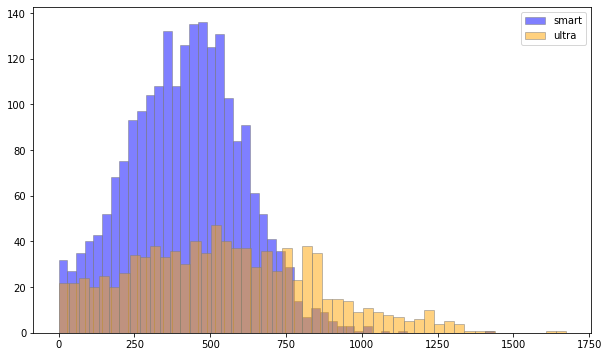

In [45]:
##КОД РЕВЬЮЕРА
import matplotlib.pyplot as plt
smart = df_general.query('tariff == "smart"')['sum']
ultra = df_general.query('tariff == "ultra"')['sum']

plt.figure(figsize=(10,6))
plt.hist(smart, bins=50, color='blue', edgecolor='grey', alpha=0.5, label = 'smart', density = False)
plt.hist(ultra, bins=50, color='orange', edgecolor='grey', alpha=0.5,label = 'ultra', density = False)
plt.legend()
plt.show()

Время разговоров в минутах в месяц по каждому тарифу

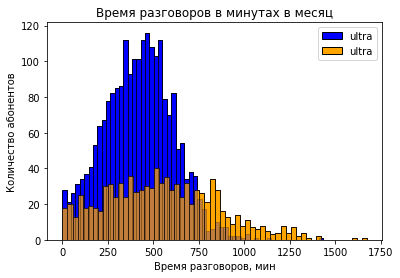

In [46]:
smart = df_general.query('tariff == "smart"')['sum']
ultra = df_general.query('tariff == "ultra"')['sum']
# matplotlib histogram
plt.hist(smart, color = 'blue', edgecolor = 'black',label = 'ultra',
         bins = 60);
plt.hist(ultra, color = 'orange', edgecolor = 'black',label = 'ultra',
         bins = 60);

# seaborn histogram
sns.distplot(smart, hist=True, kde=False, 
             bins=60, color = 'blue',
             hist_kws={'edgecolor':'black'});
sns.distplot(ultra, hist=True, kde=False, 
             bins=60, color = 'orange',
             hist_kws={'edgecolor':'black'});
# Add labels
plt.title('Время разговоров в минутах в месяц');
plt.xlabel('Время разговоров, мин');
plt.ylabel('Количество абонентов');
plt.legend();

Время разговоров в минутах по месяцам отдельно по каждому тарифу

Количество сообщений по месяцам отдельно по каждому тарифу.

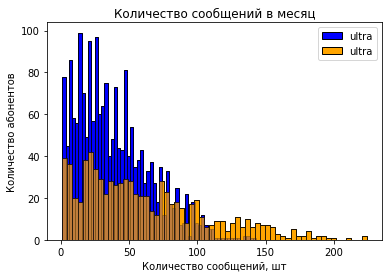

In [47]:
['id']
smart = df_general.query('tariff == "smart"')['id']
ultra = df_general.query('tariff == "ultra"')['id']
# matplotlib histogram
plt.hist(smart, color = 'blue', edgecolor = 'black',label = 'ultra',
         bins = 60);
plt.hist(ultra, color = 'orange', edgecolor = 'black',label = 'ultra',
         bins = 60);

# seaborn histogram
sns.distplot(smart, hist=True, kde=False, 
             bins=60, color = 'blue',
             hist_kws={'edgecolor':'black'});
sns.distplot(ultra, hist=True, kde=False, 
             bins=60, color = 'orange',
             hist_kws={'edgecolor':'black'});
# Add labels
plt.title('Количество сообщений в месяц');
plt.xlabel('Количество сообщений, шт');
plt.ylabel('Количество абонентов');
plt.legend();

Количество объема трафика в месяц

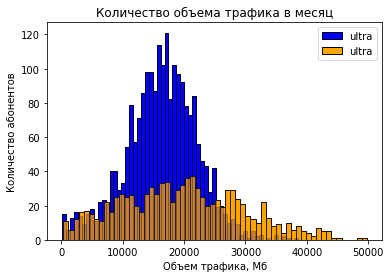

In [48]:
['mb_used']
smart = df_general.query('tariff == "smart"')['mb_used']
ultra = df_general.query('tariff == "ultra"')['mb_used']
# matplotlib histogram
plt.hist(smart, color = 'blue', edgecolor = 'black',label = 'ultra',
         bins = 60);
plt.hist(ultra, color = 'orange', edgecolor = 'black',label = 'ultra',
         bins = 60);

# seaborn histogram
sns.distplot(smart, hist=True, kde=False, 
             bins=60, color = 'blue',
             hist_kws={'edgecolor':'black'});
sns.distplot(ultra, hist=True, kde=False, 
             bins=60, color = 'orange',
             hist_kws={'edgecolor':'black'});
# Add labels
plt.title('Количество объема трафика в месяц');
plt.xlabel('Объем трафика, Мб');
plt.ylabel('Количество абонентов');
plt.legend();

Построим боксплот, чтобы визуально посмотреть выбросы

In [49]:
#Узнаем сколько человек пользуется  тарифом "Ультра.
users_ultra = users[(users['tariff'] == 'ultra')].count()['user_id']
users_ultra

149

In [50]:
#Узнаем сколько человек пользуется  тарифом "Смарт".
users_smart = users[(users['tariff'] == 'smart')].count()['user_id']
users_smart

351

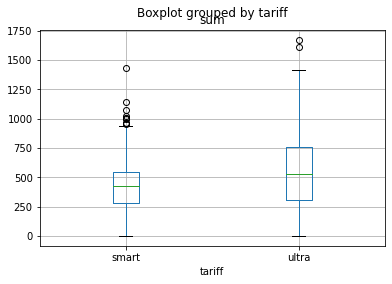

In [51]:
# Выбросы по времени разговоров в вминутах
df_general.boxplot(column='sum', by='tariff');

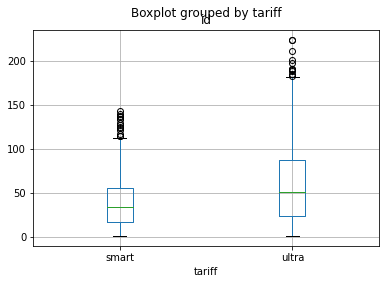

In [52]:
#Выбросы по количеству сообщений в шт
df_general.boxplot(column='id', by='tariff');

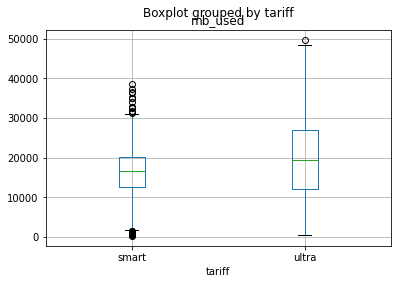

In [53]:
#Выбросы по количеству объема трафика в Мб
df_general.boxplot(column='mb_used', by='tariff');

Посчитаем среднее количество, дисперсию и стандартное отклонение по минутам, сообщения и Интернет-траффику.

Посчитаем среднее количество, дисперсию и стандартное отклонение по минутам

In [54]:
filtered_smart = df_general[(df_general['tariff'] == 'smart')]['sum']

In [55]:
filtered_ultra = df_general[(df_general['tariff'] == 'ultra')]['sum']

In [56]:
mean_smart = filtered_smart.mean()
mean_ultra = filtered_ultra.mean()
dispersion_smart = filtered_smart.var()
dispersion_ultra = filtered_ultra.var()
std_smart = filtered_smart.std()
std_ultra = filtered_ultra.std()

In [57]:
data_sum = [['Среднее минут звонков',mean_smart , mean_ultra ],
       ['Дисперсия звонков', dispersion_smart, dispersion_ultra], ['Стандартное отклонение звонков',std_smart, std_ultra]]
columns = ['name','smart','ultra']  
table_sum = pd.DataFrame(data = data_sum, columns = columns)
table_sum

,name,smart,ultra
0,Среднее минут звонков,419.062978,545.451104
1,Дисперсия звонков,35844.189551,94203.418396
2,Стандартное отклонение звонков,189.325618,306.925754


Посчитаем среднее количество, дисперсию и стандартное отклонение по сообщениям

In [58]:
filtered_smart = df_general[(df_general['tariff'] == 'smart')]['id']
                                          

In [59]:
filtered_ultra = df_general[(df_general['tariff'] == 'ultra')]['id']

In [60]:
mean_smart = filtered_smart.mean()
mean_ultra = filtered_ultra.mean()
dispersion_smart = filtered_smart.var()
dispersion_ultra = filtered_ultra.var()
std_smart = filtered_smart.std()
std_ultra = filtered_ultra.std()

In [61]:
data_id = [['Среднее количество сообщений',mean_smart , mean_ultra ],
       ['Дисперсия сообщений', dispersion_smart, dispersion_ultra], ['Стандартное отклонение сообщений',std_smart, std_ultra]]
columns = ['name','smart','ultra']  
table_id = pd.DataFrame(data = data_id, columns = columns)
table_id

,name,smart,ultra
0,Среднее количество сообщений,38.716441,61.161006
1,Дисперсия сообщений,717.594201,2109.659183
2,Стандартное отклонение сообщений,26.787949,45.931026


Посчитаем среднее количество, дисперсию и стандартное отклонение по Интернет-траффику

In [62]:
filtered_smart = df_general[(df_general['tariff'] == 'smart')]['mb_used']                                          

In [63]:
 filtered_ultra = df_general[(df_general['tariff'] == 'ultra')]['mb_used']

In [64]:
mean_smart = filtered_smart.mean()
mean_ultra = filtered_ultra.mean()
dispersion_smart = filtered_smart.var()
dispersion_ultra = filtered_ultra.var()
std_smart = filtered_smart.std()
std_ultra = filtered_ultra.std()

In [65]:
data_mb_used = [['Среднее объем трафика',mean_smart , mean_ultra ],
       ['Дисперсия объем трафика', dispersion_smart, dispersion_ultra], ['Стандартное отклонение объем трафика',std_smart, std_ultra]]
columns = ['name','smart','ultra']  
table_mb_used = pd.DataFrame(data = data_mb_used, columns = columns)
table_mb_used

,name,smart,ultra
0,Среднее объем трафика,1.622294e+04,1.968868e+04
1,Дисперсия объем трафика,3.425721e+07,9.856786e+07
2,Стандартное отклонение объем трафика,5.852966e+03,9.928135e+03


In [66]:
pd.concat((table_sum, table_id, table_mb_used), ignore_index=True)

,name,smart,ultra
0,Среднее минут звонков,4.190630e+02,5.454511e+02
1,Дисперсия звонков,3.584419e+04,9.420342e+04
2,Стандартное отклонение звонков,1.893256e+02,3.069258e+02
3,Среднее количество сообщений,3.871644e+01,6.116101e+01
4,Дисперсия сообщений,7.175942e+02,2.109659e+03
5,Стандартное отклонение сообщений,2.678795e+01,4.593103e+01
6,Среднее объем трафика,1.622294e+04,1.968868e+04
7,Дисперсия объем трафика,3.425721e+07,9.856786e+07
8,Стандартное отклонение объем трафика,5.852966e+03,9.928135e+03


В основном, на тарифе Смарт люди разговаривают в месяц в течение 350-400 минут, когда лимит общения по тарифу за абонентскую плату - 500 минут, т.е. пользователи регулярно выбирают почти полный лимит голосовой связи.
С тарифом Ультра немного иная ситуация, люди разговаривают в месяц в течение 300-500 минут,когда лимит общения по тарифу за абонентскую плату - 3000 минут

Пользователи тарифа Смарт - в среднем они отправляют до 39 СМС в месяц, когда лимит по тарифу за абонентскую плату - 50 смс. Пользователи тарифа Ультра отправляют до 61 СМС, когда лимит по тарифу за абонентскую плату - 1000 смс.

Клиенты с тарифом Смарт в среднем в месяц используют от 16200 Мб трафика. Причем, установленная абонентскаят плата - в 15 Гб. Фактически, клиенты тарифа Смарт регулярно заказывают доп. пакеты с интернетом, когда основной пакет заканчивается.
Клиенты с тарифом Ультра активней пользуются интернетом 19600 Мб, но учитывая лимит в 30 Гб, у них есть ещё большой запас по количеству оставшегося для использования трафика.

Вывод:
* В основном, на тарифе Смарт люди разговаривают в месяц в течение 350-400 минут, когда лимит общения по тарифу за абонентскую плату - 500 минут, т.е. пользователи регулярно выбирают почти полный лимит голосовой связи.
С тарифом Ультра немного иная ситуация, люди разговаривают в месяц в течение 300-500 минут,когда лимит общения по тарифу за абонентскую плату - 3000 минут.
* Пользователи тарифа Смарт - в среднем они отправляют до 39 СМС в месяц, когда лимит по тарифу за абонентскую плату - 50 смс. Пользователи тарифа Ультра отправляют до 61 СМС, когда лимит по тарифу за абонентскую плату - 1000 смс.
* Клиенты с тарифом Смарт в среднем в месяц используют от 16200 Мб трафика. Причем, установленная абонентскаят плата - в 15 Гб. Фактически, клиенты тарифа Смарт регулярно заказывают доп. пакеты с интернетом, когда основной пакет заканчивается. Клиенты с тарифом Ультра активней пользуются интернетом 19600 Мб, но учитывая лимит в 30 Гб, у них есть ещё большой запас по количеству оставшегося для использования трафика.

#  Проверьте гипотезы

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются?

Н0 (нулевая гипотеза) - Средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковые.

Н1 (альтернативная гипотеза) -Средняя выручка пользователей тарифов «Ультра» и «Смарт» отличаются между собой.

In [67]:
sum_month_mean_smart = df_general_total[(df_general_total['tariff'] == 'smart')]['sum_month'] 

In [68]:
sum_month_mean_ultra = df_general_total[(df_general_total['tariff'] == 'ultra')]['sum_month'] 

In [69]:
alpha = 0.05
results = st.ttest_ind(sum_month_mean_smart, sum_month_mean_ultra)
print('p-значение:', results.pvalue)
print('\nПороговое значение alpha = 0.05')
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160

Пороговое значение alpha = 0.05
Отвергаем нулевую гипотезу


Вывод:
Принимаем гипотезу, что средняя выручка пользователей тарифов Смарт и Ультра различается.

Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Выберем нужные нам данные - среднюю месячную выручку по Москве и по остальным регионам:

Проставим признак по каждой строке - Москва или регион:

In [70]:
df_general_total['Город'] = users['city']

In [71]:
df_general_total['Москва'] =  np.where(df_general_total['Город'] == 'Москва', 1, 0)

In [72]:
df_general_total.head()

,user_id,month,count,sum,id,mb_used,tariff,messages_included,mb_per_month_included,minutes_included,...,rub_per_message,rub_per_minute,tariff_name,mb_max,sms_max,minut_max,price_max,sum_month,Город,Москва
0,1000,5,22.0,159.0,22.0,2253.49,ultra,1000,30720,3000,...,1,1,ultra,0.0,0.0,0.0,0.0,1950.0,Краснодар,0
1,1000,6,43.0,172.0,60.0,23233.77,ultra,1000,30720,3000,...,1,1,ultra,0.0,0.0,0.0,0.0,1950.0,Москва,1
2,1000,7,47.0,340.0,75.0,14003.64,ultra,1000,30720,3000,...,1,1,ultra,0.0,0.0,0.0,0.0,1950.0,Стерлитамак,0
3,1000,8,52.0,408.0,81.0,14055.93,ultra,1000,30720,3000,...,1,1,ultra,0.0,0.0,0.0,0.0,1950.0,Москва,1
4,1000,9,58.0,466.0,57.0,14568.91,ultra,1000,30720,3000,...,1,1,ultra,0.0,0.0,0.0,0.0,1950.0,Новокузнецк,0


In [73]:
sum_month_mean_region =df_general_total[(df_general_total['Москва'] == 0)]['sum_month'] 

In [74]:
sum_month_mean_Moscow = df_general_total[(df_general_total['Москва'] == 1)]['sum_month'] 

Н0 (нулевая гипотеза) - Средняя выручка  пользователей из Москвы не отличается от выручки пользователей из других регионов.

Н1 (альтернативная гипотеза) -Средняя выручка  пользователей из Москвы и из других регионов отличаются между собой.

In [75]:
alpha = 0.05
results = st.ttest_ind(sum_month_mean_region, sum_month_mean_Moscow)
print('p-значение:', results.pvalue)
print('\nПороговое значение alpha = 0.05')
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2777237855570781

Пороговое значение alpha = 0.05
Не получилось отвергнуть нулевую гипотезу


Вывод:
Таким образом, принимаем гипотезу, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

### 5 Общий вывод

* Тариф Смарт приносит около 58% всей выручки, но при этом на него приходится 351 пользователей. Тариф Ультра дает остальные 42%, но эту выручку генерируют всего 149 пользователей.


* В основном, на тарифе Смарт люди разговаривают в месяц в течение 350-400 минут, когда лимит общения по тарифу за абонентскую плату - 500 минут, т.е. пользователи регулярно выбирают почти полный лимит голосовой связи. С тарифом Ультра , люди разговаривают в месяц в течение 300-500 минут,когда лимит общения по тарифу за абонентскую плату - 3000 минут.


* Пользователи тарифа Смарт - в среднем они отправляют до 39 СМС в месяц, когда лимит по тарифу за абонентскую плату - 50 смс. Пользователи тарифа Ультра отправляют до 61 СМС, когда лимит по тарифу за абонентскую плату - 1000 смс.


* Клиенты с тарифом Смарт в среднем в месяц используют от 16200 Мб трафика. Причем, установленная абонентскаят плата - в 15 Гб. Фактически, клиенты тарифа Смарт регулярно заказывают доп. пакеты с интернетом, когда основной пакет заканчивается. Клиенты с тарифом Ультра активней пользуются интернетом 19600 Мб, но учитывая лимит в 30 Гб, у них есть ещё большой запас по количеству оставшегося для использования трафика.


* Таким образом, в тарифной сетке есть дешевый тариф Смарт за 550 рублей, где пользователю не хватает интернета и есть тариф Ультра, стоимостью 1950 рублей, которым пользуется уже другой класс граждан, где лимитов по всем типам связи предостаточно.


* Тариф Смарт выгоден для сотового оператора «Мегалайн», так как он приносит около 58 % всей выручки и большенство пользователей (70 %) выбирают его, так его цена более демократична.